# Gam control experiments

In these experiments, we image RecB-Halo while overexpressing the Gam protein of phage lambda, which binds to the RecBCD complex and prevents its binding to DSBs.

This allows us to determine which RecB spots are due to RecB binding to DSBs.

In [1]:
from pyberries.data import DatasetPool, Fit, get_histogram
import seaborn.objects as so
from seaborn import plotting_context
import numpy as np
import pandas as pd

data = (DatasetPool(path='./../../BACMMAN_datasets',
                    dsList=['240227_1', '240227_2', '240227_3',
                            '230725_1', '230725_2', '230126_DT23', '230719_1', '230719_2', '240424_1', '240612_1', '240620_1',
                            '230118_DT23', '230720_1', '230720_2', '230726_cipro30', '230824_1', '230829_1', '230201_DT23', '230504_2sec', '230718_2sec', '240424_2', '240612_2', '240620_2',
                            '240227_4', '240301_1', '240301_2'
                            ],
                    groups=['0 ng/ml, Gam', '0 ng/ml, Gam', '0 ng/ml, Gam',
                            '0 ng/ml, WT', '0 ng/ml, WT', '0 ng/ml, WT', '0 ng/ml, WT', '0 ng/ml, WT', '0 ng/ml, WT', '0 ng/ml, WT', '0 ng/ml, WT',
                            '30 ng/ml, WT', '30 ng/ml, WT', '30 ng/ml, WT', '30 ng/ml, WT', '30 ng/ml, WT', '30 ng/ml, WT', '30 ng/ml, WT', '30 ng/ml, WT', '30 ng/ml, WT', '30 ng/ml, WT', '30 ng/ml, WT', '30 ng/ml, WT',
                            '30 ng/ml, Gam', '30 ng/ml, Gam', '30 ng/ml, Gam'
                            ],
                    metadata='DateTime',
                    filters={'all':'Frame < 50'},
                    rename_objects={'Spot_detection':'RecB_spots'},
                    rename_cols={'SpotCount':'RecBSpotCount'}
                    )
        .drop_duplicates(object_name='RecB_spots', subset=['Dataset', 'Position', 'TrackHeadIndices'])
        .assign(Time_min=lambda df: df.Time_min + 15)
        .bin_column(col='Time_min', binsize=15, binlabels='left')
        .split_column(col='Group', new_cols=['Cipro', 'Strain'], delimiter=', ')
        .assign(Cipro=lambda df: df.Cipro.astype('category').cat.set_categories(['0 ng/ml', '30 ng/ml'], ordered=True),
                Strain=lambda df: df.Strain.astype('category').cat.set_categories(['WT', 'Gam'], ordered=True),
                Group=lambda df: df.Group.astype('category').cat.set_categories(['0 ng/ml, WT', '0 ng/ml, Gam', '30 ng/ml, WT', '30 ng/ml, Gam'], ordered=True)
                )
        )

Dataset 240227_1 (group 0 ng/ml, Gam): loaded objects ['Bacteria_large', 'RecB_spots', 'RecB_raw']
Dataset 240227_2 (group 0 ng/ml, Gam): loaded objects ['Bacteria_large', 'RecB_spots', 'RecB_raw']
Dataset 240227_3 (group 0 ng/ml, Gam): loaded objects ['Bacteria_large', 'RecB_spots', 'RecB_raw']
Dataset 230725_1 (group 0 ng/ml, WT): loaded objects ['Bacteria_large', 'RecB_spots', 'RecA', 'RecB_raw']
Dataset 230725_2 (group 0 ng/ml, WT): loaded objects ['Bacteria_large', 'RecB_spots', 'RecA', 'RecB_raw']
Dataset 230126_DT23 (group 0 ng/ml, WT): loaded objects ['Bacteria_large', 'RecB_spots', 'RecB_raw']
Dataset 230719_1 (group 0 ng/ml, WT): loaded objects ['Bacteria_large', 'RecB_spots', 'RecB_raw']
Dataset 230719_2 (group 0 ng/ml, WT): loaded objects ['Bacteria_large', 'RecB_spots', 'RecB_raw']
Dataset 240424_1 (group 0 ng/ml, WT): loaded objects ['Bacteria_large', 'RecB_spots', 'RecB_raw', 'Nucleoid']
Dataset 240612_1 (group 0 ng/ml, WT): loaded objects ['Bacteria_large', 'RecB_spots'

## General statistics

Number of cells (Gam only)

In [3]:
display(data
        .Bacteria_large
        .query('Frame == 0 and Strain == "Gam"')
        .agg({'Indices':'count'})
        )

Indices    8812
dtype: int64

Number of spots (Gam only)

In [4]:
display(data
        .RecB_spots
        .query('Strain == "Gam"')
        .agg({'Indices':'count'})
        )

Indices    18698
dtype: int64

Total number of cells

In [49]:
display(data
        .Bacteria_large
        .query('Frame == 0')
        .agg({'Indices':'count'})
        )

Indices    41403
dtype: int64

Total number of spots

In [50]:
display(data
        .RecB_spots
        .agg({'Indices':'count'})
        )

Indices    96453
dtype: int64

## Cell length

This is a control to show that when Gam overexpression is induced, RecBCD doesn't bind to DSBs, so the SOS response is not induced, and cells don't elongate.

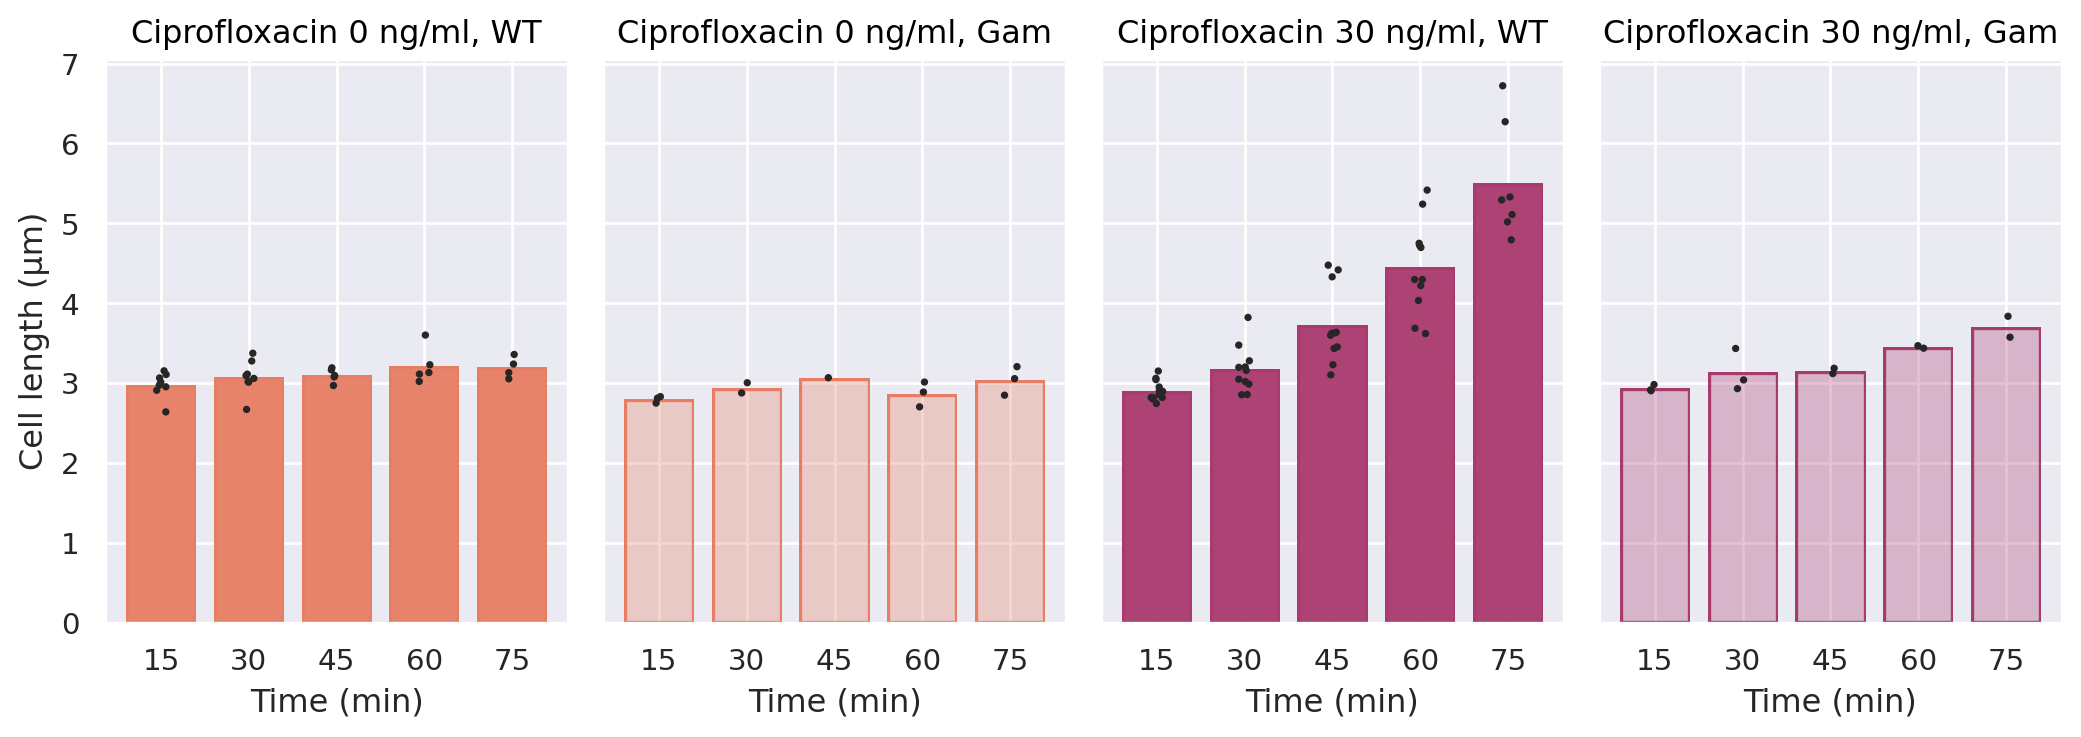

In [2]:
df = (data
      .Bacteria_large
      .groupby(['Group', 'Cipro', 'Strain', 'Dataset', 'Time_min_bin'], observed=True)
      .agg({'SpineLength':'mean'})
      .query('Time_min_bin <= 75')
      )

(
 so.Plot(df, x='Time_min_bin', y='SpineLength', color='Cipro', alpha='Strain')
 .layout(size=(11, 4))
 .facet(col='Group')
 .add(so.Bar(), so.Agg(), legend=False)
 .add(so.Dots(color='k', marker='.', fillalpha=1, alpha=1), so.Jitter(), legend=False)
 .scale(color=so.Nominal('flare', order=['0 ng/ml', '', '', '30 ng/ml']), x=so.Continuous().tick(every=15))
 .share(y=True)
 .limit(x=(None, None), y=(None, None))
 .label(x="Time (min)", y="Cell length (µm)", title='Ciprofloxacin {}'.format, color='Ciprofloxacin', alpha='Strain')
#  .save(loc='/media/daniel/HDD Daniel/DanielThedie/Python/RecB_article/SI_Figures/Cell_length_Gam.pdf', format='pdf', bbox_inches='tight')
 )

Numerical values corresponding to the plot above.

In [6]:
display(df.groupby(['Group', 'Time_min_bin'], observed=True).agg({'SpineLength':['mean', 'std']}))

SpineLength          
                                  mean       std
Group         Time_min_bin                      
0 ng/ml, WT   15.0            2.977642  0.158604
              30.0            3.077672  0.208034
              45.0            3.100510  0.087059
              60.0            3.220099  0.225870
              75.0            3.196236  0.132324
0 ng/ml, Gam  15.0            2.798114  0.042351
              30.0            2.941373  0.090188
              45.0            3.068067       NaN
              60.0            2.868529  0.156022
              75.0            3.037505  0.179569
30 ng/ml, WT  15.0            2.906007  0.123043
              30.0            3.173376  0.282961
              45.0            3.721861  0.473601
              60.0            4.453680  0.577063
              75.0            5.506376  0.712181
30 ng/ml, Gam 15.0            2.934428  0.041586
              30.0            3.135514  0.264382
              45.0            3.153141  0.047322
              60.0            3.453427  0.022048
              75.0            3.706140  0.185254

## RecB spot lifetime histograms

When Gam is overexpressed, RecB spot lifetime histograms at 30 ng/ml ciprofloxacin can be fitted with a mono-exponential decay.

In [2]:
hist = get_histogram(data.RecB_spots, col='TrackLength', binsize=1, groupby=['Dataset','Group','Cipro','Strain'], density=True, binlabels='left')
monoexp_fit = Fit(hist, x='TrackLength', y='proportion', model_type='monoexp_decay',
                   groupby=['Dataset','Group','Cipro','Strain'], p0=[1, 0.1])

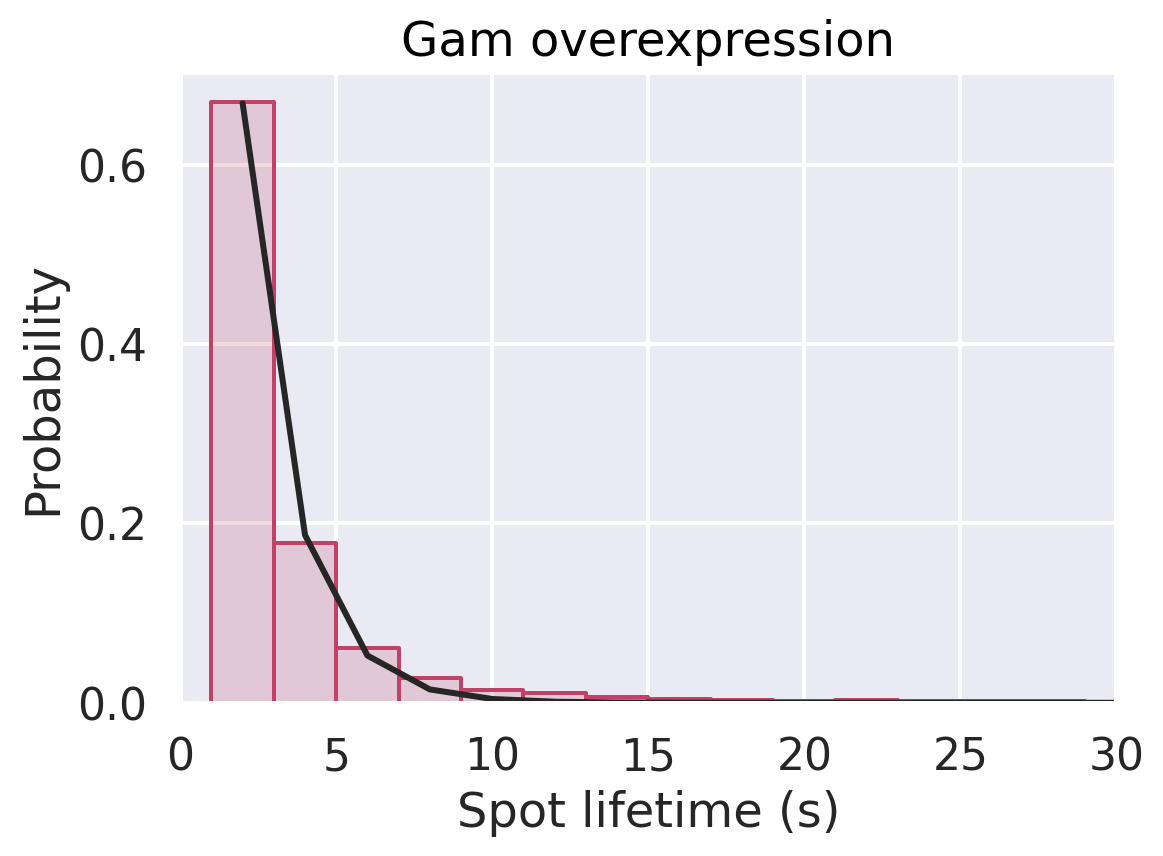

In [56]:
df = (monoexp_fit
      .data
      .assign(TrackLength_s=lambda df: df.TrackLength*2)
      .query('Group == "30 ng/ml, Gam"')
      )

(
    so.Plot(df, x='TrackLength_s', y='proportion', color='Strain', edgecolor='Cipro')
    .add(so.Bars(alpha=.2, edgewidth=1.5, edgestyle='-'), so.Agg(), so.Dodge(), legend=False)
    .add(so.Line(color='k'), so.Agg(), y='Fit', legend=False)
    .scale(x=so.Continuous(), color='flare', edgecolor='flare')
    .limit(x=(0, 30), y=(None, None))
    .label(x="Spot lifetime (s)", y="Probability", color='Ciprofloxacin', title='Gam overexpression')
    .theme(plotting_context('talk'))
    .save(loc='/media/daniel/HDD Daniel/DanielThedie/Presentations/241002_SMBacIII/Gam_monoexp_fit.svg', format='svg', bbox_inches='tight')
)

### Define a threshold so that 95% of RecB spots in Gam experiments are shorter

TrackLength_s    10.0
dtype: float64

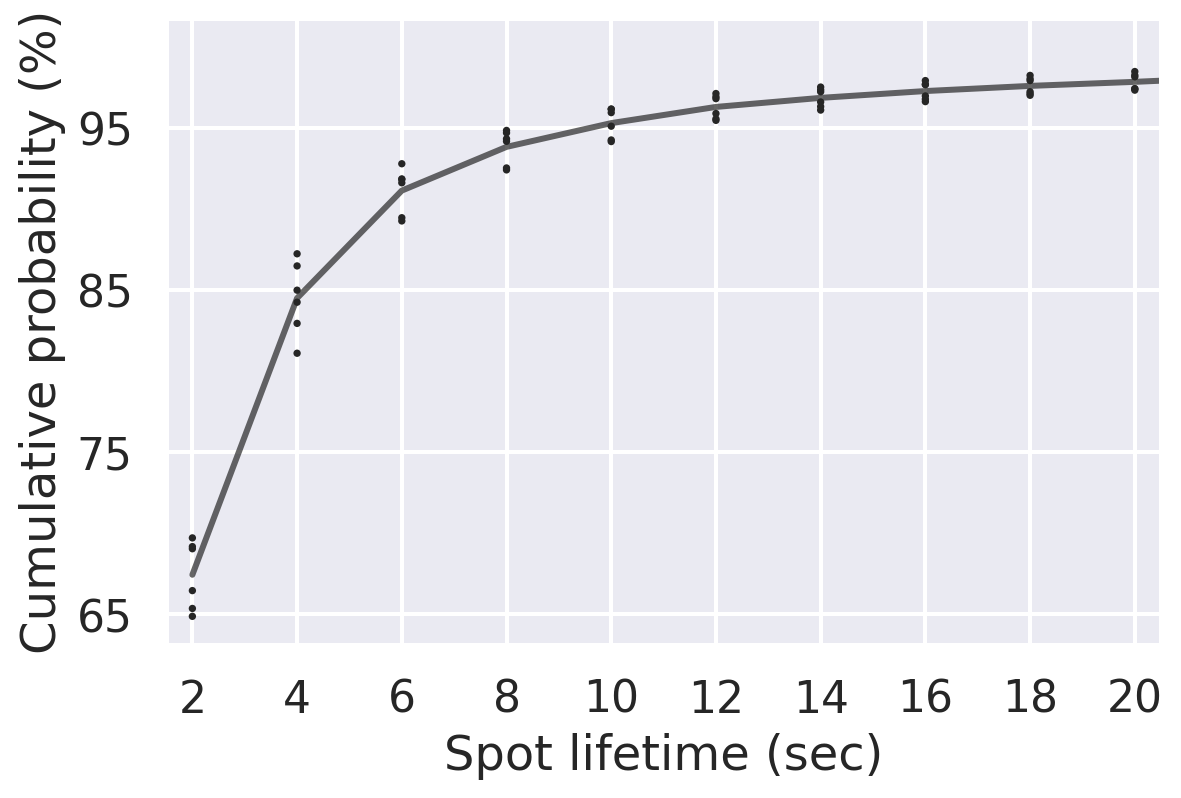

In [62]:
df = (hist
      .query('Strain == "Gam"')
      .sort_values('TrackLength')
      .assign(Sum_shorter=lambda df: df.groupby('Dataset')['proportion'].cumsum().mul(100),
              TrackLength_s=lambda df: df.TrackLength*2
              )
      )

display(df.query('Sum_shorter > 95').groupby('Dataset').agg({'TrackLength_s':'min'}).median())

(
    so.Plot(df, x='TrackLength_s', y='Sum_shorter')
    .layout(size=(6.5, 4.5))
    .add(so.Line(color='k', alpha=0.7), so.Agg())
    .add(so.Dots(color='k', marker='.', fillalpha=1))
    .scale(x=so.Continuous().tick(every=2), y=so.Continuous().tick(at=[65, 75, 85, 95]))
    .limit(x=(1.5, 20.5))
    .label(x='Spot lifetime (sec)', y='Cumulative probability (%)')
    .theme(plotting_context("talk"))
    .save('/media/daniel/HDD Daniel/DanielThedie/Figures/RecB_article_figures/2_Cipro_RecB/Gam_thresholding.svg', format='svg', bbox_inches='tight')
)

### Bi-exponential fit

We fit wild-type and Gam data with a bi-exponential to show the disappearance of the long-lived spots population.

In [3]:
hist = get_histogram(data.RecB_spots, col='TrackLength', binsize=1, groupby=['Dataset','Group','Cipro','Strain'], density=True, binlabels='left')
biexp_fit = Fit(hist, x='TrackLength', y='proportion', model_type='biexp_decay',
                   groupby=['Dataset','Group','Cipro','Strain'], p0=[1, 1, 0.1, 0.1], bootstrap_samples=100)

/home/daniel/miniconda3/envs/pyberries_dev/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/daniel/miniconda3/envs/pyberries_dev/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/daniel/miniconda3/envs/pyberries_dev/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/daniel/miniconda3/envs/pyberries_dev/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/daniel/miniconda3/envs/pyberries_dev/lib/python3.11

#### Show fit components

In [4]:
from pyberries.data import get_model

monoexp_decay = get_model('monoexp_decay')

biexp_fit.data[['Fit_fast', 'Fit_slow']] = pd.DataFrame(columns=['Fit_fast', 'Fit_slow'], dtype='float64')
for ds, df in biexp_fit.data.groupby('Dataset'):
    params = biexp_fit.parameters.query('Dataset == @ds')
    df = (df
          .assign(Fit_fast = lambda df: monoexp_decay(df.TrackLength,
                                                      Amplitude=params.query('Parameter == "Amplitude_1"').Value.iloc[0],
                                                      Rate=params.query('Parameter == "Rate_1"').Value.iloc[0]),
                  Fit_slow = lambda df: monoexp_decay(df.TrackLength,
                                                      Amplitude=params.query('Parameter == "Amplitude_2"').Value.iloc[0],
                                                      Rate=params.query('Parameter == "Rate_2"').Value.iloc[0])
                  )
          )
    biexp_fit.data.loc[biexp_fit.data.Dataset == ds,:] = df

In [5]:
def split_column(df, col, new, delimiter):
        df[new] = (df[col]
                        .str.split(delimiter, expand=True)
                        )
        return df

lifetimes = (biexp_fit
             .parameters
             .copy()
             .pipe(lambda df: split_column(df, col='Parameter', new=['Parameter', 'Rate_type'], delimiter='_'))
             .replace({'1':'Short', '2':'Long'})
             .pipe(lambda df: pd.pivot_table(df, values=['Value'], index=['Group', 'Dataset'], columns=['Parameter', 'Rate_type']))
             .reset_index()
             .assign(Lifetime_Short=lambda df: 1/(df.Value.Rate.Short) *2,
                     Lifetime_Long=lambda df: 1/(df.Value.Rate.Long) *2,
                     Population_Long=lambda df: df.Value.Amplitude.Long/(df.Value.Amplitude.Short+df.Value.Amplitude.Long) *100,
                     Population_Short=lambda df: 100 - df.Population_Long
                     )
             .drop(columns=['Value'], level=0)
             .droplevel(['Parameter', 'Rate_type'], axis=1)
             .melt(id_vars=['Group', 'Dataset'])
             .pipe(lambda df: split_column(df, col='variable', new=['Parameter', 'Rate_type'], delimiter='_'))
             .drop(columns='variable')
             )

Print a table to be appended to the main spot lifetimes table.

In [17]:
def fuse_cols(df, cols, new, delimiter):
        df[new] = (df[cols]
                   .astype('str')
                   .agg(delimiter.join, axis=1)
                   )
        return df

df = (lifetimes
      .query('Group == "0 ng/ml, Gam" or Group == "30 ng/ml, Gam"')
      .pipe(lambda df: pd.pivot_table(df, values='value', index=['Group', 'Dataset', 'Rate_type'], columns='Parameter'))
      .groupby(['Group', 'Rate_type'], observed=True)
      .agg(Lifetime_mean=('Lifetime', 'mean'),
           Lifetime_std=('Lifetime', 'std'),
           Population_mean=('Population', 'mean'),
           Population_std=('Population', 'std')
           )
      .round(1)
      .pipe(lambda df: fuse_cols(df, cols=['Lifetime_mean', 'Lifetime_std'], new='Lifetime (sec)', delimiter=' $\pm$ '))
      .pipe(lambda df: fuse_cols(df, cols=['Population_mean', 'Population_std'], new='Proportion (\%)', delimiter=' $\pm$ '))
      [['Lifetime (sec)', 'Proportion (\%)']]
      .rename_axis(['Ciprofloxacin', 'Population'])
      .reindex(['Short', 'Long'], level=1)
      )

display(df)
print(df.to_latex())

Lifetime (sec) Proportion (\%)
Ciprofloxacin Population                                
0 ng/ml, Gam  Short        1.7 $\pm$ 0.2  99.2 $\pm$ 0.4
              Long        15.5 $\pm$ 9.1   0.8 $\pm$ 0.4
30 ng/ml, Gam Short        1.5 $\pm$ 0.1  98.2 $\pm$ 0.9
              Long         8.2 $\pm$ 1.8   1.8 $\pm$ 0.9

\begin{tabular}{llll}
\toprule
 &  & Lifetime (sec) & Proportion (\%) \\
Ciprofloxacin & Population &  &  \\
\midrule
\multirow[t]{2}{*}{0 ng/ml, Gam} & Short & 1.7 $\pm$ 0.2 & 99.2 $\pm$ 0.4 \\
 & Long & 15.5 $\pm$ 9.1 & 0.8 $\pm$ 0.4 \\
\cline{1-4}
\multirow[t]{2}{*}{30 ng/ml, Gam} & Short & 1.5 $\pm$ 0.1 & 98.2 $\pm$ 0.9 \\
 & Long & 8.2 $\pm$ 1.8 & 1.8 $\pm$ 0.9 \\
\cline{1-4}
\bottomrule
\end{tabular}



#### Show bi-exponential fit for Gam data only

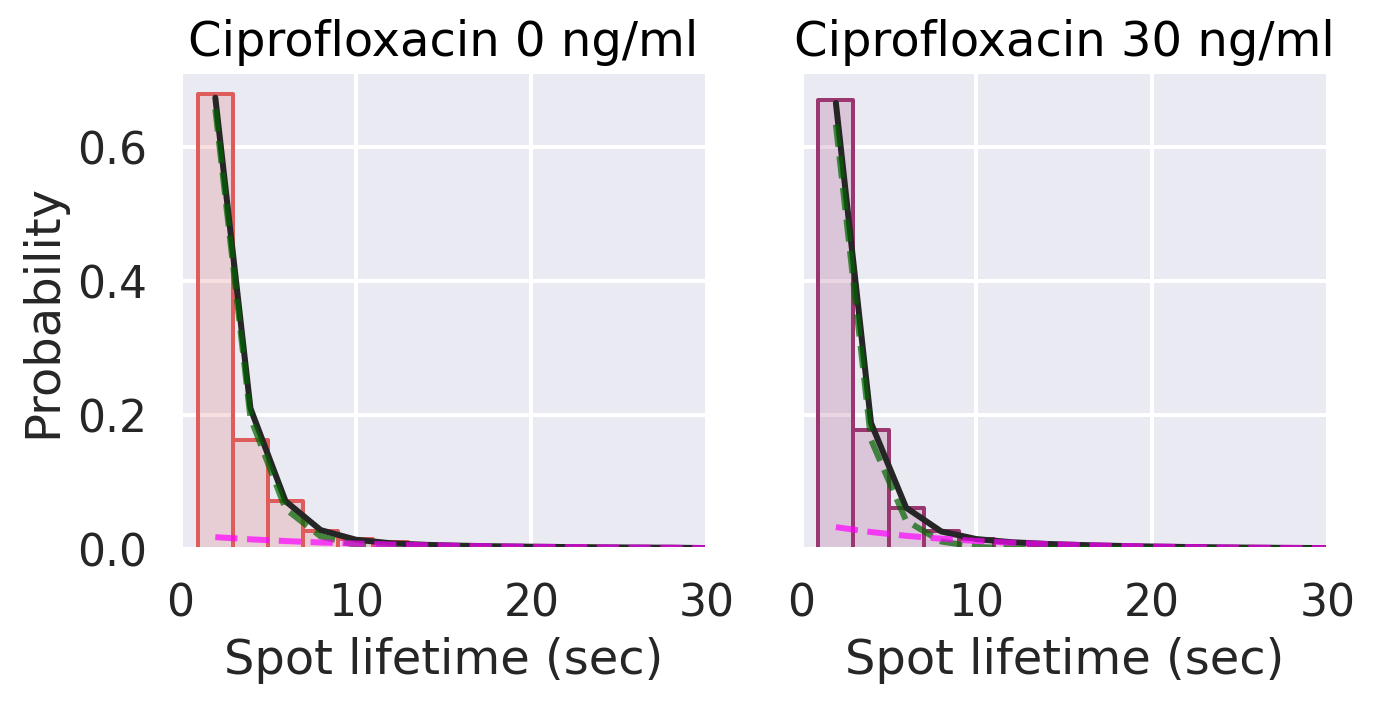

In [54]:
df = (biexp_fit
      .data
      .assign(TrackLength_s=lambda df:df.TrackLength *2)
      .query("Strain == 'Gam'")
      )

(
    so.Plot(df, x='TrackLength_s', edgecolor='Cipro', color='Cipro')
    .layout(size=(7.5, 4))
    .facet(col='Cipro')
    .add(so.Bars(alpha=0.2, edgewidth=1.5, edgestyle='-'), so.Agg(), y='proportion', legend=False)
    .add(so.Line(color='k', alpha=1), so.Agg(), y='Fit', legend=False)
    .add(so.Line(linestyle='--', color='darkgreen', alpha=0.7), so.Agg(), y='Fit_fast', legend=False)
    .add(so.Line(linestyle='--', color='fuchsia', alpha=0.7), so.Agg(), y='Fit_slow', legend=False)
    .scale(color='flare', edgecolor='flare')
    .limit(x=(0, 30), y=(None, None))
    .label(x="Spot lifetime (sec)", y="Probability", color='Ciprofloxacin', title='Ciprofloxacin {}'.format)
    .theme(plotting_context('talk'))
    .save(loc='/media/daniel/HDD Daniel/DanielThedie/Figures/RecB_article_figures/2_Cipro_RecB/Gam_lifetimes_fits.svg', format='svg', bbox_inches='tight')
)

Zoom on the histogram tail

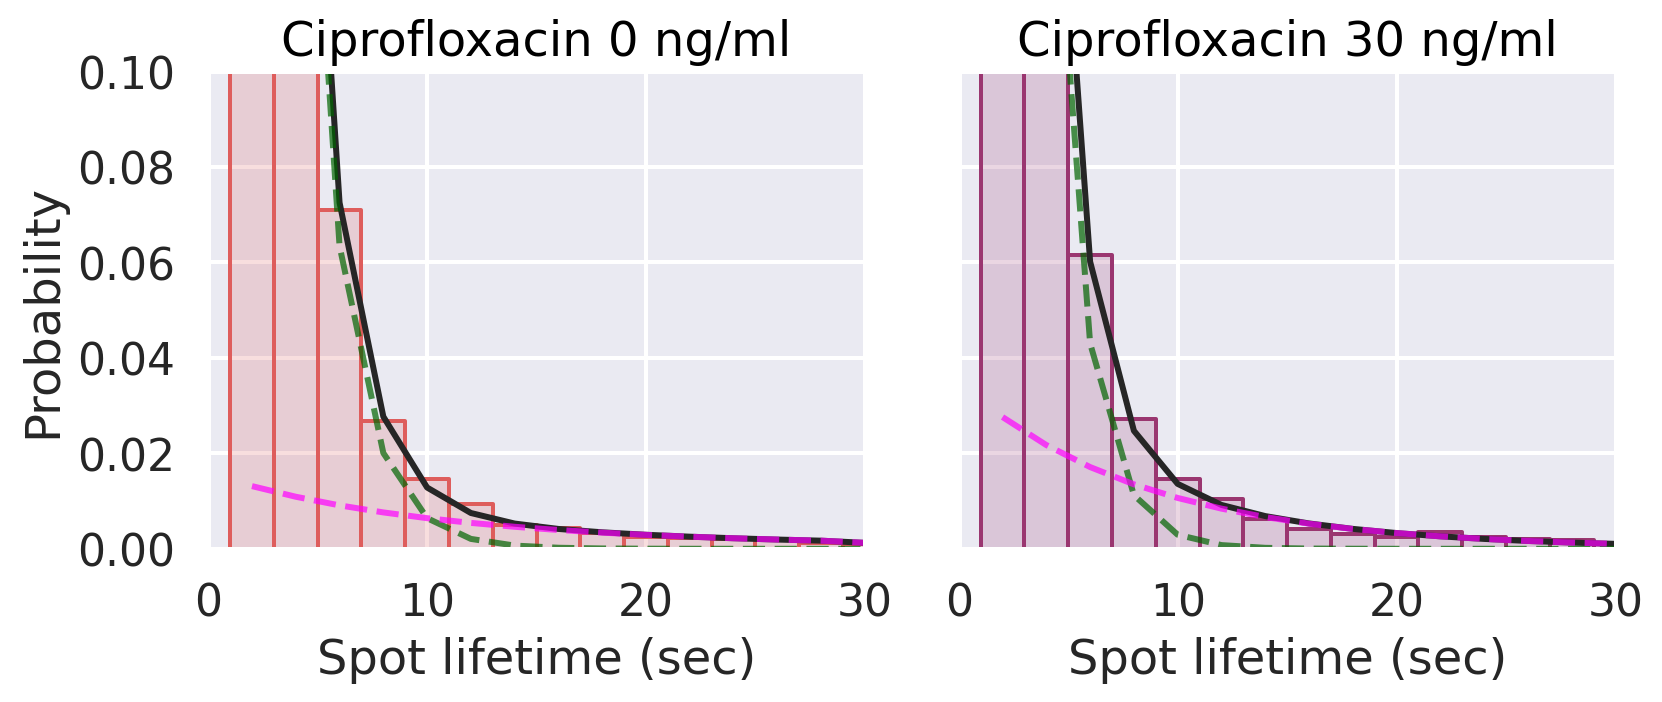

In [8]:
df = (biexp_fit
      .data
      .assign(TrackLength_s=lambda df:df.TrackLength *2)
      .query("Strain == 'Gam'")
      )

(
    so.Plot(df, x='TrackLength_s', edgecolor='Cipro', color='Cipro')
    .layout(size=(9,4))
    .facet(col='Cipro')
    .add(so.Bars(alpha=0.2, edgewidth=1.5, edgestyle='-'), so.Agg(), y='proportion', legend=False)
    .add(so.Line(color='k', alpha=1), so.Agg(), y='Fit', legend=False)
    .add(so.Line(linestyle='--', color='darkgreen', alpha=0.7), so.Agg(), y='Fit_fast', legend=False)
    .add(so.Line(linestyle='--', color='fuchsia', alpha=0.7), so.Agg(), y='Fit_slow', legend=False)
    .scale(color='flare', edgecolor='flare')
    .limit(x=(0, 30), y=(None, 0.1))
    .label(x="Spot lifetime (sec)", y="Probability", color='Ciprofloxacin', title='Ciprofloxacin {}'.format)
    .theme(plotting_context('talk'))
    .save(loc='/media/daniel/HDD Daniel/DanielThedie/Python/RecB_article/SI_Figures/Gam_lifetimes_fits_B.svg', format='svg', bbox_inches='tight')
)

### Overlay WT and Gam histograms to highlight the difference

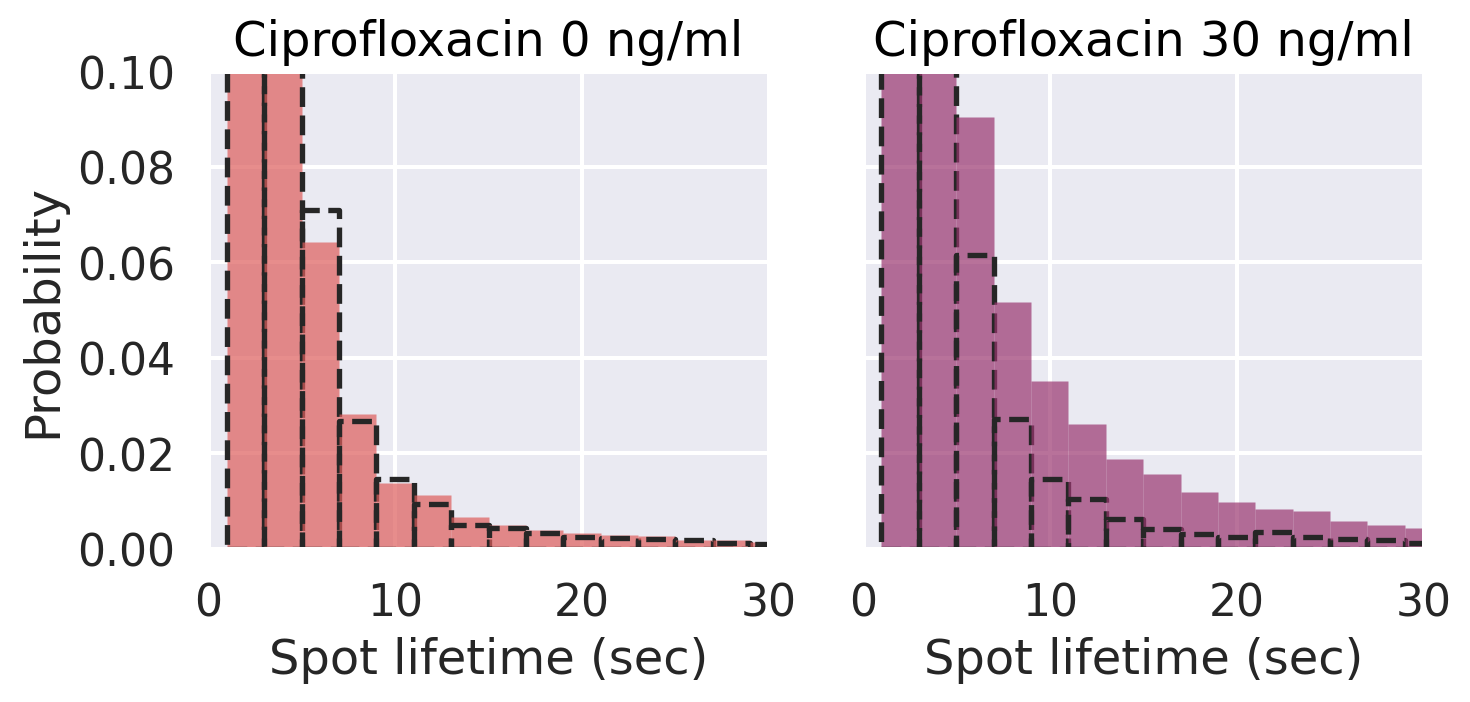

In [48]:
df = (biexp_fit
      .data
      .assign(TrackLength_s=lambda df:df.TrackLength *2)
      .assign(Strain=lambda df: df.Strain.astype('category').cat.set_categories(['WT', 'Gam'], ordered=True))
      )

(
    so.Plot(df, x='TrackLength_s', y='proportion', fill='Strain', edgealpha='Strain', color='Cipro')
    .layout(size=(8,4))
    .facet(col='Cipro')
    .add(so.Bars(edgestyle='--', edgecolor='k', edgewidth=2), so.Agg(), legend=False)
    .scale(color='flare', edgealpha=[1, 0], fill=[False, True])
    .limit(x=(0, 30), y=(None, 0.1))
    .label(x="Spot lifetime (sec)", y="Probability", color='Ciprofloxacin', title='Ciprofloxacin {}'.format)
    .theme(plotting_context('talk'))
    .save(loc='/media/daniel/HDD Daniel/DanielThedie/Python/RecB_article/SI_Figures/Gam_lifetimes_vs_WT_B.svg', format='svg', bbox_inches='tight')
)